<a href="https://colab.research.google.com/github/Kiron-Ang/DSC/blob/main/differential_gene_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
print("Printing version numbers. . .")
!python -V

import seaborn as sns
print("seaborn", sns.__version__)

import matplotlib.pyplot as plt
import matplotlib
print("matplotlib", matplotlib.__version__)

import pandas as pd
print("pandas", pd.__version__)

Printing version numbers. . .
Python 3.10.12
seaborn 0.13.2
matplotlib 3.8.0
pandas 2.2.2


In [10]:
expr_data = pd.read_table('storey03_results.tab', sep='\t')
expr_data

,PlatePosition,p-value,fold-change (log base 2)
0,HK1A1,0.012233,1.203
1,HK1A2,0.076120,-0.521
2,HK1A4,0.995303,0.002
3,HK1A5,0.042129,0.690
4,HK1A6,0.847457,0.053
...,...,...,...
3165,TNF1H5,0.053110,-0.567
3166,TNF1H7,0.338880,-0.363
3167,TNF1H9,0.541262,-0.206
3168,TNF1H10,0.257054,-0.272


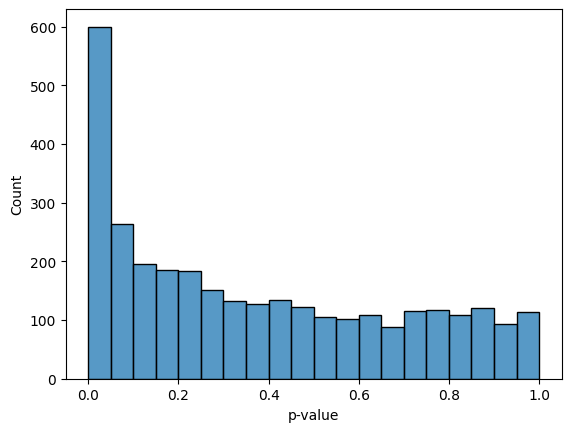

In [11]:
sns.histplot(expr_data['p-value'], bins=20)
plt.savefig('pval_hist.pdf')

In [12]:
expr_data[expr_data['p-value'] < 0.05].shape

(600, 3)

In [13]:
expr_data[expr_data['p-value'] < 0.01].shape

(268, 3)

In [16]:
from statsmodels.stats.multitest import multipletests
bonf_p = multipletests(expr_data['p-value'], alpha=0.05, method='bonferroni')
bonf_p

(array([False, False, False, ..., False, False, False]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 1.618071905529206e-05,
 1.577287066246057e-05)

In [17]:
0.05 / 3170

1.577287066246057e-05

In [21]:
for value in bonf_p[0]:
  if value == True:
    print(value)

True
True


In [18]:
expr_data[expr_data['p-value'] < (0.05 / 3170)].shape[0]

2

In [26]:
bh_p = multipletests(expr_data['p-value'], alpha=0.05, method='fdr_bh')
bh_p

(array([False, False, False, ..., False, False, False]),
 array([0.13280821, 0.31708279, 0.99750553, ..., 0.78360274, 0.56081211,
        0.16083333]),
 1.618071905529206e-05,
 1.577287066246057e-05)

In [27]:
sum(bh_p[0])

88

In [34]:
only_true = []

for index in range(0, len(bh_p[1])):
  if bh_p[0][index] == True:
    only_true.append(bh_p[1][index])

len(only_true)

88

In [37]:
list(bh_p[1]).index(max(only_true))

144

In [46]:
expr_data[144:145]

,PlatePosition,p-value,fold-change (log base 2)
144,HV2F4,0.001379,-1.176
